In [2]:
import pandas as pd
data = pd.read_csv("D:\Design Thinking\code\Dataset\dataset.csv")
data.columns

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14',
       'Symptom_15', 'Symptom_16', 'Symptom_17'],
      dtype='object')

In [4]:
data2 = pd.read_csv("D:\Design Thinking\code\Dataset\symptom_Description.csv")
data2.columns


Index(['Disease', 'Description'], dtype='object')

In [7]:
data3 = pd.read_csv("D:\Design Thinking\code\Dataset\symptom_precaution.csv")
data3.columns


Index(['Disease', 'Precaution_1', 'Precaution_2', 'Precaution_3',
       'Precaution_4'],
      dtype='object')

In [9]:
data4 = pd.read_csv("D:\Design Thinking\code\Dataset\Symptom-severity.csv")
print(data4)


                  Symptom  weight
0                 itching       1
1               skin_rash       3
2    nodal_skin_eruptions       4
3     continuous_sneezing       4
4               shivering       5
..                    ...     ...
128    inflammatory_nails       2
129               blister       4
130  red_sore_around_nose       2
131     yellow_crust_ooze       3
132             prognosis       5

[133 rows x 2 columns]


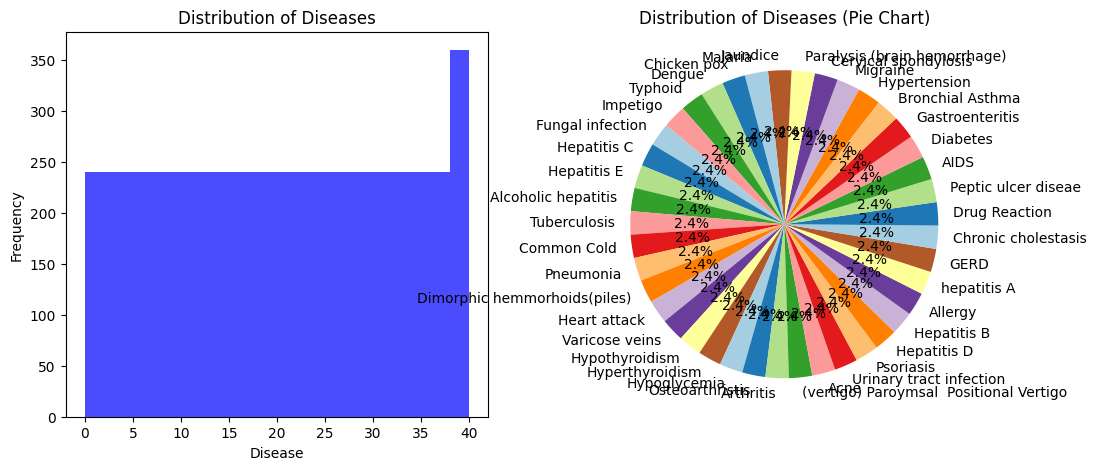

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        19
          16       1.00      1.00      1.00        28
          17 

In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("D:\Design Thinking\code\Dataset\dataset.csv")

# Encode categorical labels
le = LabelEncoder()
data['Disease'] = le.fit_transform(data['Disease'])

# One-hot encode categorical symptom columns
symptom_columns = [col for col in data.columns if col.startswith('Symptom_')]
data = pd.get_dummies(data, columns=symptom_columns, drop_first=True)

# Separate features (X) and target variable (y)
X = data.drop('Disease', axis=1)
y = data['Disease']

# Plot a histogram of the 'Disease' variable
plt.figure(figsize=(12, 5))

# Subplot 1: Histogram
plt.subplot(1, 2, 1)
plt.hist(data['Disease'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Diseases')
plt.xlabel('Disease')
plt.ylabel('Frequency')

# Subplot 2: Pie Chart
plt.subplot(1, 2, 2)
disease_counts = data['Disease'].value_counts()
labels = le.inverse_transform(disease_counts.index)  # Convert back to original labels
plt.pie(disease_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Diseases (Pie Chart)')

plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display classification report
print(classification_report(y_test, y_pred))


C:\Users\USER\AppData\Local\Temp\ipykernel_7800\2082981372.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Disease'] = le.fit_transform(filtered_data['Disease'])


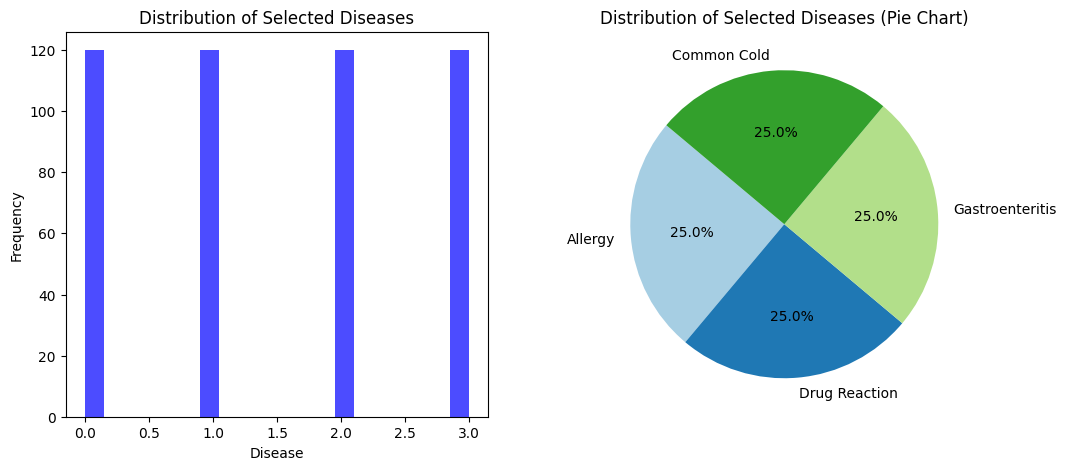

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        24

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



In [16]:
# Load the dataset
data = pd.read_csv("D:\Design Thinking\code\Dataset\dataset.csv")

# Filter for specific diseases
selected_diseases = ['Common Cold', 'Diabetes', 'Gastroenteritis', 'Drug Reaction', 'Allergy']
filtered_data = data[data['Disease'].isin(selected_diseases)]

# Encode categorical labels
le = LabelEncoder()
filtered_data['Disease'] = le.fit_transform(filtered_data['Disease'])

# One-hot encode categorical symptom columns
symptom_columns = [col for col in filtered_data.columns if col.startswith('Symptom_')]
filtered_data = pd.get_dummies(filtered_data, columns=symptom_columns, drop_first=True)

# Separate features (X) and target variable (y)
X = filtered_data.drop('Disease', axis=1)
y = filtered_data['Disease']

# Plot a histogram of the 'Disease' variable
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(filtered_data['Disease'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Selected Diseases')
plt.xlabel('Disease')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
disease_counts = filtered_data['Disease'].value_counts()
labels = le.inverse_transform(disease_counts.index)
plt.pie(disease_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Selected Diseases (Pie Chart)')

plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))


e:\Python3.10.7\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


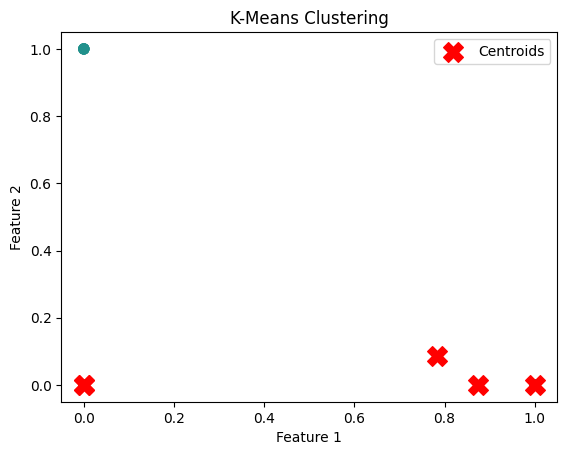

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X_train and X_test are already prepared

# Specify the number of clusters (you need to know or experiment with the appropriate number)
num_clusters = 5

# Concatenate the training and testing data for clustering
X_combined = pd.concat([X_train, X_test], axis=0)

# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model on the combined data
kmeans.fit(X_combined)

# Predict the clusters for the combined data
cluster_labels = kmeans.predict(X_combined)

# Visualize the clusters
plt.scatter(X_combined.iloc[:, 0], X_combined.iloc[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
